# Tugas Pola II
+ NAMA : ALIDIN
+ NIM_  : F1D018006


Diberikan dataset berikut:

In [85]:
#Load Library
import numpy as np
import math
import matplotlib.pyplot as plt

x=np.round(10*np.random.rand(7,9))
y=np.round(10*np.random.rand(6,9))+8
print("data x :\n",x, "\n")
print("data y :\n",y, "\n")

q=np.round(10*np.random.rand(1,9))+7
print("data q :\n",q, "\n")

data x :
 [[ 7.  4.  3.  7.  2.  1.  3.  6.  2.]
 [ 6.  5.  7.  3.  3. 10.  2.  4.  2.]
 [ 7.  1.  5.  5.  7.  9.  6.  3.  7.]
 [ 8.  9.  5.  6.  6.  7.  3.  6.  8.]
 [ 7.  3.  5.  4.  3.  8.  2.  5.  8.]
 [ 7.  4.  7.  6.  1.  0.  9.  6.  3.]
 [ 9.  8.  5.  2.  4.  8.  7.  1.  6.]] 

data y :
 [[10.  8. 10. 17. 14. 10. 10.  9.  9.]
 [10. 16. 17. 13. 14. 10. 18. 12. 12.]
 [ 9. 13. 13. 13. 12. 12. 17. 17. 16.]
 [17. 14. 14. 10. 17. 18. 16. 11. 11.]
 [11. 17. 17. 11. 15. 13. 14. 15. 14.]
 [16. 12. 18.  9.  8.  8. 17. 16.  9.]] 

data q :
 [[15. 15. 16.  8.  7. 12. 17.  8.  8.]] 



Data diatas dikelompokkan menjadi 2 kelas, yaitu kelas -1 untuk data x, dan kelas 1 untuk data y. Sedangkan data q merupakan data yang tak diketahui kelasnya. Pandanglah bahwa data x dan y sebagai data latih. Untuk itu ada beberapa tugas yang harus dikerjakan yaitu:

a. Rancanganlah LDA untuk menentukan diskriminasi data diatas dan selanjutnya visualisasikan data hasil disriminantnya/hasil proeksinya secara 2 dimensi

b. Visualisasikan data q, apakah masuk kelas -1 atau kelas 1

c. Tentukan kemiripan dari data q terhadap data latih (x dan y) dengan menggunakan: Euclideance (Kel 1 dan 2),  Cosine distance (Kel 3 dan 4), Mahalanobis Distance (Kel 5 dan 6). 

Catatan: Kerjakan menggunakan jupyter notebook

# nomor 1

In [86]:
# buat data x,y menjadi satu sebagai fitur dan label di kolom terakir:
x = np.pad(x, ((0,0),(0,1)), mode="constant", constant_values = -1)
x

array([[ 7.,  4.,  3.,  7.,  2.,  1.,  3.,  6.,  2., -1.],
       [ 6.,  5.,  7.,  3.,  3., 10.,  2.,  4.,  2., -1.],
       [ 7.,  1.,  5.,  5.,  7.,  9.,  6.,  3.,  7., -1.],
       [ 8.,  9.,  5.,  6.,  6.,  7.,  3.,  6.,  8., -1.],
       [ 7.,  3.,  5.,  4.,  3.,  8.,  2.,  5.,  8., -1.],
       [ 7.,  4.,  7.,  6.,  1.,  0.,  9.,  6.,  3., -1.],
       [ 9.,  8.,  5.,  2.,  4.,  8.,  7.,  1.,  6., -1.]])

In [87]:
y = np.pad(y, ((0,0),(0,1)), mode="constant", constant_values = 1)
y

array([[10.,  8., 10., 17., 14., 10., 10.,  9.,  9.,  1.],
       [10., 16., 17., 13., 14., 10., 18., 12., 12.,  1.],
       [ 9., 13., 13., 13., 12., 12., 17., 17., 16.,  1.],
       [17., 14., 14., 10., 17., 18., 16., 11., 11.,  1.],
       [11., 17., 17., 11., 15., 13., 14., 15., 14.,  1.],
       [16., 12., 18.,  9.,  8.,  8., 17., 16.,  9.,  1.]])

In [88]:
# menggabung data :
data = np.vstack((x,y))
data

array([[ 7.,  4.,  3.,  7.,  2.,  1.,  3.,  6.,  2., -1.],
       [ 6.,  5.,  7.,  3.,  3., 10.,  2.,  4.,  2., -1.],
       [ 7.,  1.,  5.,  5.,  7.,  9.,  6.,  3.,  7., -1.],
       [ 8.,  9.,  5.,  6.,  6.,  7.,  3.,  6.,  8., -1.],
       [ 7.,  3.,  5.,  4.,  3.,  8.,  2.,  5.,  8., -1.],
       [ 7.,  4.,  7.,  6.,  1.,  0.,  9.,  6.,  3., -1.],
       [ 9.,  8.,  5.,  2.,  4.,  8.,  7.,  1.,  6., -1.],
       [10.,  8., 10., 17., 14., 10., 10.,  9.,  9.,  1.],
       [10., 16., 17., 13., 14., 10., 18., 12., 12.,  1.],
       [ 9., 13., 13., 13., 12., 12., 17., 17., 16.,  1.],
       [17., 14., 14., 10., 17., 18., 16., 11., 11.,  1.],
       [11., 17., 17., 11., 15., 13., 14., 15., 14.,  1.],
       [16., 12., 18.,  9.,  8.,  8., 17., 16.,  9.,  1.]])

In [89]:
# ambi fitur dan label
# fitur X, label Y
X = data[:,:-1] 
X

array([[ 7.,  4.,  3.,  7.,  2.,  1.,  3.,  6.,  2.],
       [ 6.,  5.,  7.,  3.,  3., 10.,  2.,  4.,  2.],
       [ 7.,  1.,  5.,  5.,  7.,  9.,  6.,  3.,  7.],
       [ 8.,  9.,  5.,  6.,  6.,  7.,  3.,  6.,  8.],
       [ 7.,  3.,  5.,  4.,  3.,  8.,  2.,  5.,  8.],
       [ 7.,  4.,  7.,  6.,  1.,  0.,  9.,  6.,  3.],
       [ 9.,  8.,  5.,  2.,  4.,  8.,  7.,  1.,  6.],
       [10.,  8., 10., 17., 14., 10., 10.,  9.,  9.],
       [10., 16., 17., 13., 14., 10., 18., 12., 12.],
       [ 9., 13., 13., 13., 12., 12., 17., 17., 16.],
       [17., 14., 14., 10., 17., 18., 16., 11., 11.],
       [11., 17., 17., 11., 15., 13., 14., 15., 14.],
       [16., 12., 18.,  9.,  8.,  8., 17., 16.,  9.]])

In [90]:
Y = data[:,-1]
Y

array([-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [91]:
# membuat class LDA:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )
        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # menentukan SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)

        # eigen value dan eigen vektor dari (A) = SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] vektor kolom, transpose permudh penghitunga
        eigenvectors = eigenvectors.T
        # sort eigen dari tinggi ke rendah
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # mbil skor sebanyak (n) value terbesar dri eigen vektor (dapat fitur erbaik)
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # peyoeksi data
        return np.dot(X, self.linear_discriminants.T)


Shape of X: (13, 9)
Shape of transformed X: (13, 2)
/home/ryuujin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


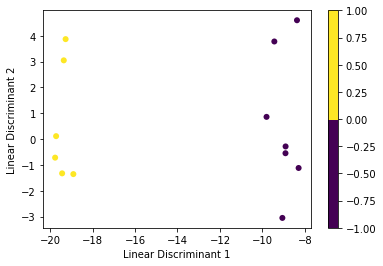

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Project data, cukup 2 saja krn harus di representasikan dalam bentuk 2d
lda = LDA(2)
lda.fit(X, Y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=Y, edgecolor='none',
        cmap=plt.cm.get_cmap('viridis', 2))

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()


In [93]:
# hasil transform train data
X_projected

array([[ -8.37117095+0.j        ,   4.60320677-1.22291459j],
       [ -9.05936981+0.j        ,  -3.05093231+0.36195525j],
       [ -8.90802477+0.j        ,  -0.2833266 -0.70093373j],
       [ -9.80543429+0.j        ,   0.86170524-0.97488581j],
       [ -8.91298798+0.j        ,  -0.5462435 -0.27413825j],
       [ -9.43797555+0.j        ,   3.78077053-0.35092084j],
       [ -8.29428038+0.j        ,  -1.1173978 -0.92121305j],
       [-19.27103405+0.j        ,   3.87228874-1.57860741j],
       [-19.71874799+0.j        ,   0.11495698-0.01427716j],
       [-19.4349131 +0.j        ,  -1.32563641-0.66176988j],
       [-19.76496969+0.j        ,  -0.71681944-1.55153053j],
       [-18.90618454+0.j        ,  -1.35439851+0.20996809j],
       [-19.35734904+0.j        ,   3.05056492+0.09645887j]])

# nomor2

In [94]:
# hasil tansoform test data
Y_pred = lda.transform(q)
Y_pred

array([[-19.64748189+0.j        ,  -0.88304893-0.28294362j]])

In [95]:
x1_pred = Y_pred[:,0]
x2_pred = Y_pred[:,1]

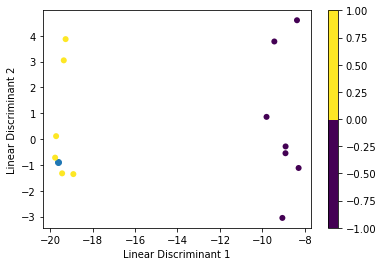

In [96]:
plt.scatter(x1_pred, x2_pred)
plt.scatter(x1, x2,
        c=Y, edgecolor='none',
        cmap=plt.cm.get_cmap('viridis', 2))


plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()


In [97]:
# dot berwarna biru merupakan prediksi dari dari q, dilihat dari posisinya q memiliki label 1

# nomor 3

In [98]:
a = q[0]
a

array([15., 15., 16.,  8.,  7., 12., 17.,  8.,  8.])

In [107]:
x[:,:-1]

array([[ 7.,  4.,  3.,  7.,  2.,  1.,  3.,  6.,  2.],
       [ 6.,  5.,  7.,  3.,  3., 10.,  2.,  4.,  2.],
       [ 7.,  1.,  5.,  5.,  7.,  9.,  6.,  3.,  7.],
       [ 8.,  9.,  5.,  6.,  6.,  7.,  3.,  6.,  8.],
       [ 7.,  3.,  5.,  4.,  3.,  8.,  2.,  5.,  8.],
       [ 7.,  4.,  7.,  6.,  1.,  0.,  9.,  6.,  3.],
       [ 9.,  8.,  5.,  2.,  4.,  8.,  7.,  1.,  6.]])

In [108]:
# simmilarity q dengan label x atau y
# dalam kasus ini q memiliki label 1, maka prioritas difokuskan ke data y
simmilarity_x = []
for b in x[:,:-1]:
    power = np.power(a-b,2)
    sums = np.sum(power)
    euclidian = np.sqrt(sums)
    simmilarity_x.append(euclidian)
simmilarity_x

[27.147743920996454,
 24.166091947189145,
 23.366642891095847,
 20.8806130178211,
 24.71841418861655,
 23.302360395462088,
 20.493901531919196]

In [106]:
y[:,:-1]

array([[10.,  8., 10., 17., 14., 10., 10.,  9.,  9.],
       [10., 16., 17., 13., 14., 10., 18., 12., 12.],
       [ 9., 13., 13., 13., 12., 12., 17., 17., 16.],
       [17., 14., 14., 10., 17., 18., 16., 11., 11.],
       [11., 17., 17., 11., 15., 13., 14., 15., 14.],
       [16., 12., 18.,  9.,  8.,  8., 17., 16.,  9.]])

In [109]:
simmilarity_y = []
for b in y[:,:-1]:
    power = np.power(a-b,2)
    sums = np.sum(power)
    euclidian = np.sqrt(sums)
    simmilarity_y.append(euclidian)
simmilarity_y

[17.175564037317667,
 11.74734012447073,
 15.620499351813308,
 12.96148139681572,
 13.74772708486752,
 9.848857801796104]

In [110]:
avg_x = np.mean(simmilarity_x)
avg_y = np.mean(simmilarity_y)
print (f"avg x = {avg_x} \navg y = {avg_y}")
# nilai euclidian yang lebih kecil mendaakan data tersebut mimiliki simmilarity yang lebih tinggi dengan data y yang memiliki label 1

avg x = 23.439395413300055 
avg y = 13.516911632846842
